In [1]:
import GrainSizing
import plotting
import helper

import warnings
warnings.filterwarnings("ignore")

## Measure grain sizes in labels and predictions

Grain sizes are measured for all image files of masks in `PATH` with a specific format (`mask_format`, default = tif). `PATH` can have sub-folders named 'test', 'train'.; If `do_subfolders` == True any existing sub-folder will be used.   
- A keystring (`mask_str`) for filtering file names can be used.
- Alternatives to the default ellipsoid fitting are available.

In [2]:
#set path to cellpose output
PATH = "F:/cellpose/fh/"
#optional filters for grain size measuring
filters= {
    'edge':[False,.1],
    'px_cutoff':[False,10]
    }
#optional properties for regionprops
properties=['label','area','centroid','major_axis_length','minor_axis_length']

In [3]:
#measure grainsizes
lbl_grains,lbl_res_props,lbl_IDs = GrainSizing.measure.batch_grainsize(PATH,filters=filters,properties=properties,mute=True,return_results=True)

F:/cellpose/fh//: 0file [00:00, ?file/s]
F:/cellpose/fh//train: 100%|██████████| 24/24 [00:03<00:00,  7.36file/s]


In [9]:
#get image-, label- and pred-paths
imgs,lbls,preds = helper.evaluate.dataset_loader([PATH],label_str='mask',pred_str='fh_pred')
_,_,preds_boosted = helper.evaluate.dataset_loader([PATH],label_str='mask',pred_str='boosted_pred')
#set plot elements
elements= ['image','mask','ellipse_b','ellipse_a','ellipse']

No regionprops: Finding grains...


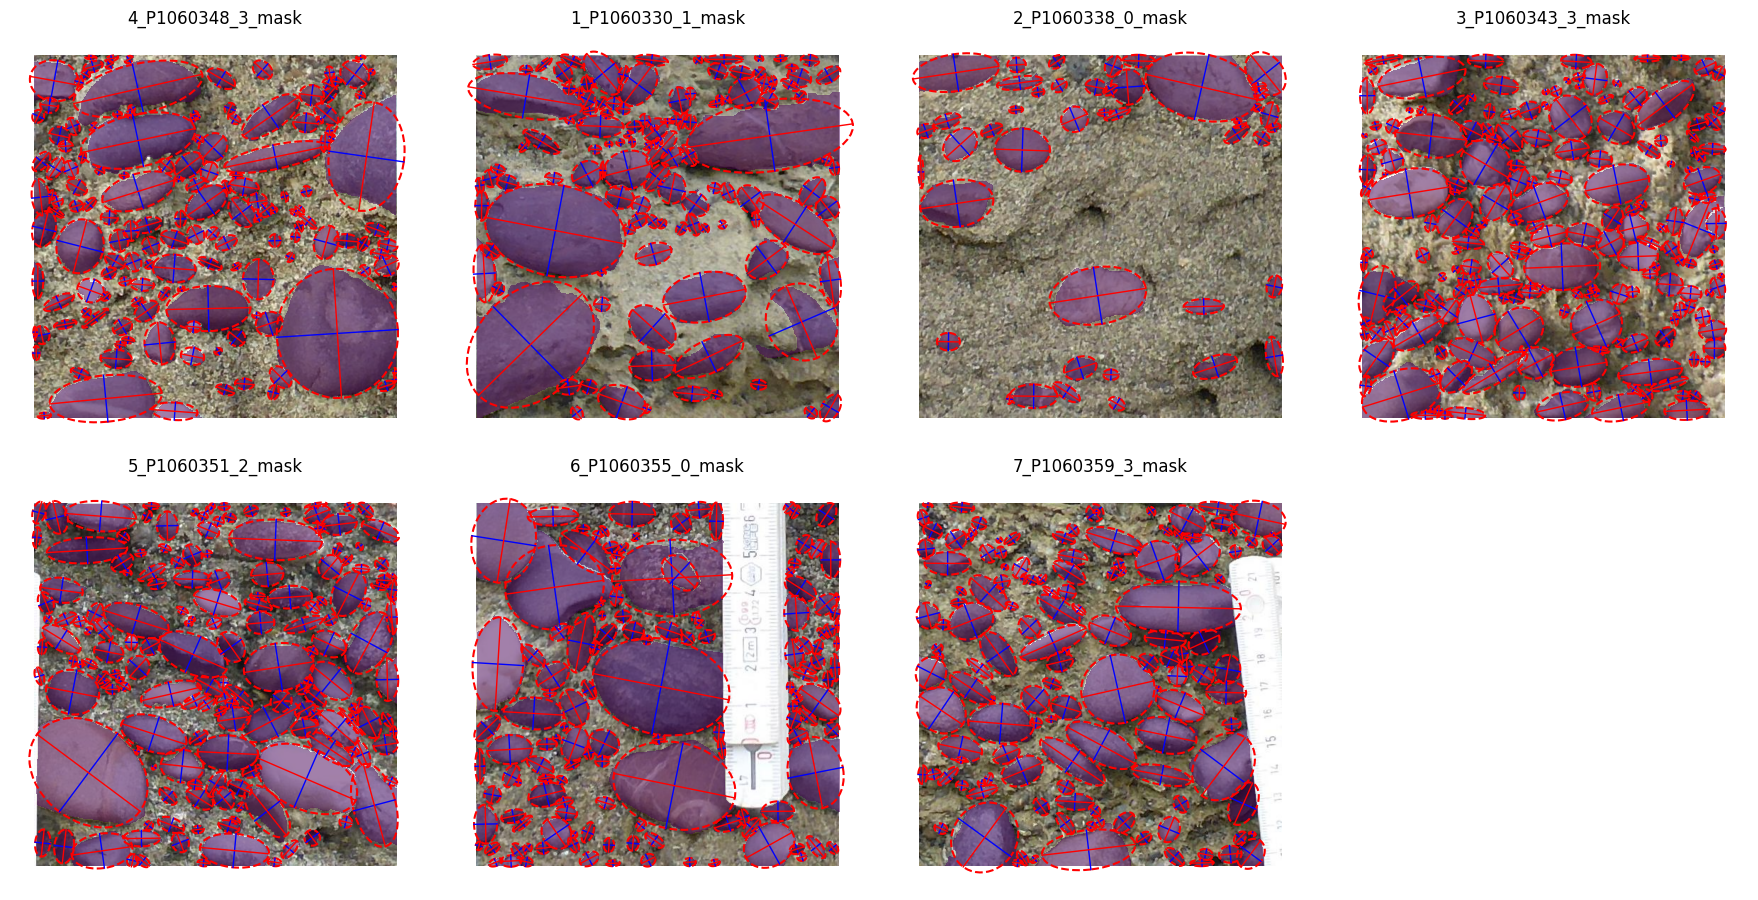

In [10]:
label_grains = plotting.grains.inspect_dataset_grains(imgs,lbls);

No regionprops: Finding grains...


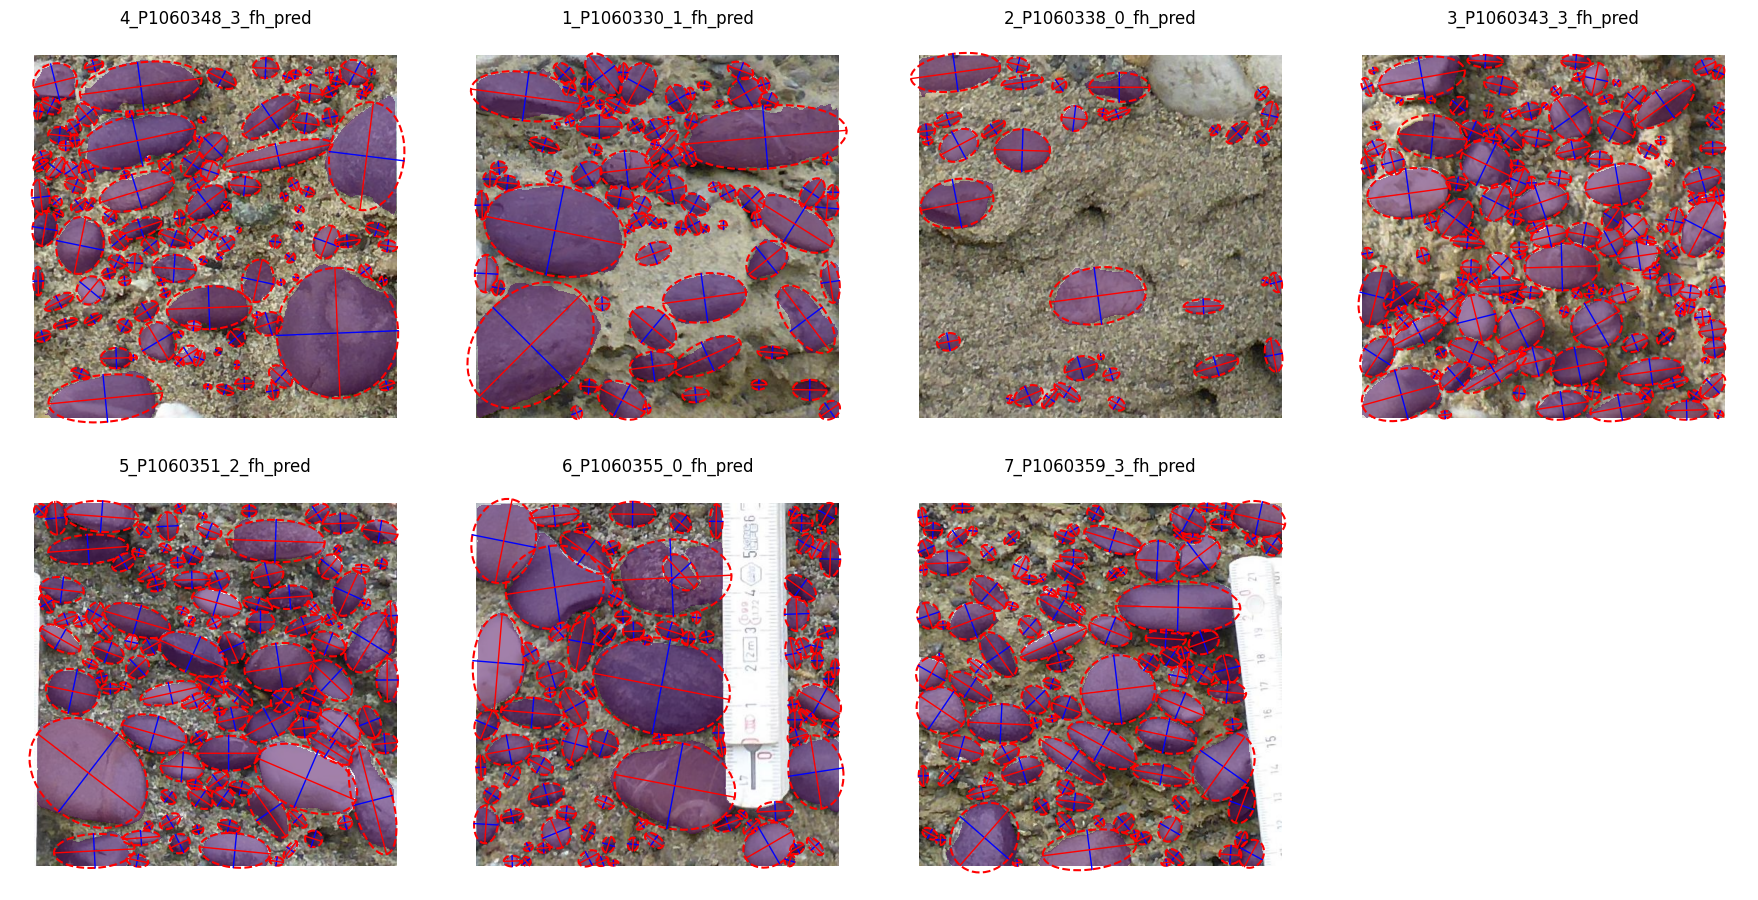

In [11]:
prediction_grains = plotting.grains.inspect_dataset_grains(imgs,preds);

No regionprops: Finding grains...


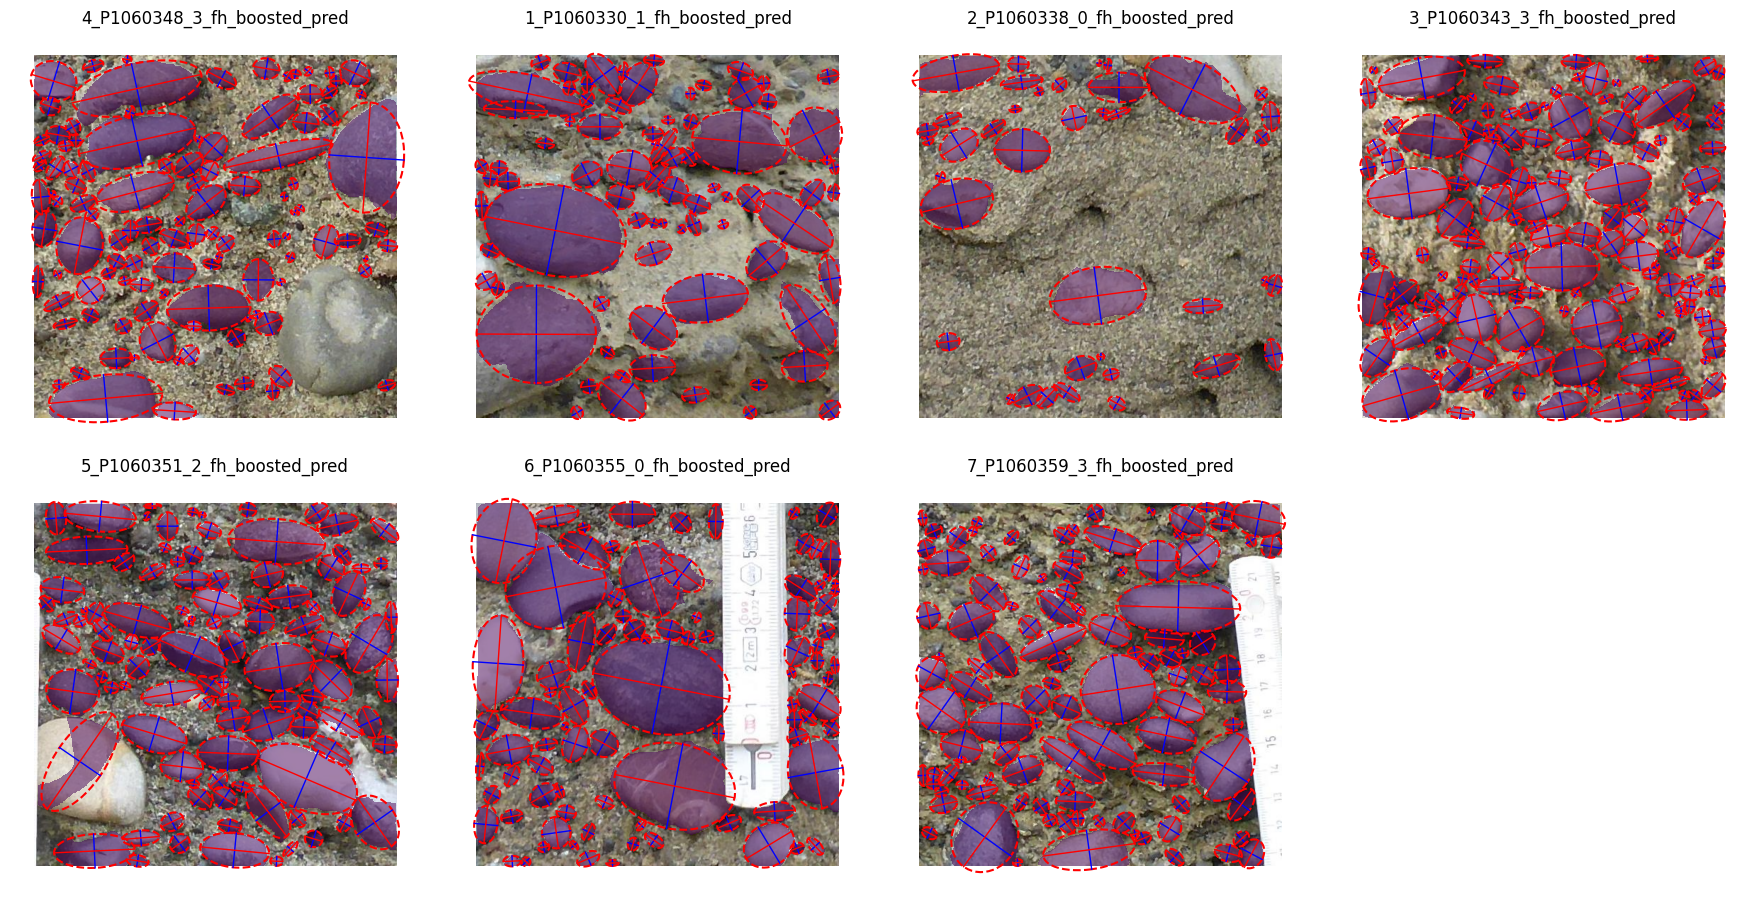

In [12]:
prediction_grains_2 = plotting.grains.inspect_dataset_grains(imgs,preds_boosted);

## Re-scale grain sizes with image resolution

In [13]:
camera_parameters = {
    'image_distance_m': [], 
    'focal_length_mm': [],
    'sensorH_mm': [],
    'sensorW_mm': [],
    'pixelsW':[],
    'pixelsH':[],
    }
resolution = 5

In [14]:
GrainSizing.scale.re_scale_dataset([PATH],resolution=[1],gsd_str='_grains');